In [472]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import numpy as np
from scipy import stats
from matplotlib.ticker import MaxNLocator, StrMethodFormatter
from sklearn.cluster import KMeans
from sklearn import mixture

## Считываем данные
Сперва считаем все данные в датафрейм и взглянем на них

* уникальный идентификатор события (поле event_ id)
* дату и время события (поле date)
* уникальный ID пользователя (поле cookie_id)
* уникальный идентификатор сессии, в рамках которой произошло событие (поле session_id)
* сайт, на котором произошло событие (поле domain_id)
* тип события (поле event_ type) (включает в себя: визит, клик по кнопке, использование
  фильтра)

In [447]:
df = pd.read_csv('data.csv')

In [448]:
df

,event_id,date,cookie_id,session_id,event_type,domain_id
0,092656bc-da3a-42b2-87b2-bc7349cf1e91,2020-08-18 00:00:01.065710,9e2c1cf7-83a4-4fcf-9d87-63e316a0c91f,f6ffb2a7-dfbd-40d7-ad25-a08c5a3a1323,read_block ...,a1fb2d2a-9c3e-49e2-a651-cf52fbf0212a
1,4ee06cf5-24cc-478f-9acf-4e286516177f,2020-08-18 00:00:01.066429,9e2c1cf7-83a4-4fcf-9d87-63e316a0c91f,f6ffb2a7-dfbd-40d7-ad25-a08c5a3a1323,read_block ...,a1fb2d2a-9c3e-49e2-a651-cf52fbf0212a
2,ddc54ec1-46de-48ee-b906-9d8ce3d64b37,2020-08-18 00:00:02.582822,9e2c1cf7-83a4-4fcf-9d87-63e316a0c91f,f6ffb2a7-dfbd-40d7-ad25-a08c5a3a1323,read_block ...,a1fb2d2a-9c3e-49e2-a651-cf52fbf0212a
3,a34f5180-a533-4dd0-bb0c-a61bfb40b74a,2020-08-18 00:00:02.582836,9e2c1cf7-83a4-4fcf-9d87-63e316a0c91f,f6ffb2a7-dfbd-40d7-ad25-a08c5a3a1323,read_block ...,a1fb2d2a-9c3e-49e2-a651-cf52fbf0212a
4,962ae9a7-b768-46e2-b9bd-48dcdc78d0d9,2020-08-18 00:00:03.225834,b82ab5d5-228b-4f41-89c4-4eb74bfb4653,8645bfcd-c7be-4014-9f83-0c78be8d1f21,read_block ...,34308d56-1149-42a1-a0d9-5652c915ac9e
...,...,...,...,...,...,...
4124729,a8545e1b-8f2f-4e57-af3c-7aa1a361b48f,2020-09-08 23:59:53.341022,8c0027fc-150f-41d6-9806-c78d3f1c610e,bf373079-7717-4460-99a5-a321ed017a01,read_block ...,a1fb2d2a-9c3e-49e2-a651-cf52fbf0212a
4124730,af2e6832-d289-47fd-a2f7-95a5d57e54d9,2020-09-08 23:59:53.447630,776d81f8-1b30-44af-b727-e7c69a5c3ac1,213d7401-91b4-4db9-862d-24f31520610a,hover ...,4915e85e-59db-475f-859d-e5f235ab7d0b
4124731,7315fe32-aad9-4bf9-a33a-51ef41147c5e,2020-09-08 23:59:53.534833,776d81f8-1b30-44af-b727-e7c69a5c3ac1,213d7401-91b4-4db9-862d-24f31520610a,click ...,4915e85e-59db-475f-859d-e5f235ab7d0b
4124732,a0771c18-ec97-4420-a63a-c8042a3b8131,2020-09-08 23:59:53.795669,8c0027fc-150f-41d6-9806-c78d3f1c610e,bf373079-7717-4460-99a5-a321ed017a01,read_block ...,a1fb2d2a-9c3e-49e2-a651-cf52fbf0212a


На всякий случай проверяем, нету ли пропущенных значений

In [449]:
df.isnull().sum()

event_id      0
date          0
cookie_id     0
session_id    0
event_type    0
domain_id     0
dtype: int64

В полях `event_type` данные записаны в таком формате: `event_type<n колличество пробелов>`
Я думаю от этих пробелов стоит избавиться и перезаписать всю колонку.

In [450]:
df['event_type'][0]

'read_block                                                                                                                                                                                                                                                '

In [451]:
df['event_type'] = df['event_type'].apply(lambda x: x.split(' ')[0])

Так же я хочу перевести `date` в datetime формат, чтобы, например, проверить на сколько в среднем человек задерживается на том или инном сайте.

In [452]:
df['date'] = pd.to_datetime(df['date'])

А теперь, предлагаю взглянуть на общее описание, и сделать некоторые предположения:

1. Так как общее кол-во `event_id` равно кол-ву уникальных, тогда можно утверждать, что каждый `event_id` уникален, что логично.
2. Практически все даты уникальны, но т.к. даты представлены с достаточно большой точностью, я думаю что это:
    * действие свершённое одним пользователем вызвало несколько паралельных событий
    * присутсвует маленькая вероятность, что два или больше пользователей совершили действие одновременно
    * так же есть вероятность, что в приведённых выше данных допущена ошибка и данные клонировались
3. Судя по `coockie_id` всего 167122 уникальных пользователей
4. Судя по `session_id` всего 240018 уникальных сессий.
5. Всего 22 типа событий
6. Всего 9 уникальных сайтов

In [453]:
df.describe()

,event_id,date,cookie_id,session_id,event_type,domain_id
count,4124734,4124734,4124734,4124734,4124734,4124734
unique,4124734,4116964,167122,240018,22,9
top,0e22342e-bab8-411b-9787-0c4950862345,2020-09-04 18:01:59.580912,9e2c1cf7-83a4-4fcf-9d87-63e316a0c91f,222b2840-ff1c-47cf-ac5a-2f7f4eac3e0b,read_block,997d6180-cc73-4e0b-b02f-5e1e07211841
freq,1,3,674858,114720,2541371,1179188
first,NaN,2020-08-18 00:00:01.065710,NaN,NaN,NaN,NaN
last,NaN,2020-09-08 23:59:54.218274,NaN,NaN,NaN,NaN


Начнём с даты, и для начала исключим вариант с дубликатами полей.
Дупликаты полей подразумевают, что поля полностью одинаковы, а т.к. в колонке `event_id` кол-во уникальных равно общемц кол-ву, а следовательно можно утверждать, что поля не являются копиями. 

Проверим теорию, где разные пользователи выполняют действие одновременно.
Всего 9% из дублированных по датам имеют разных пользователей. Я не считаю, что эти 9% играют большую роль.
Поэтому можно сказать, что дублированность объясняется тем, что пользователь активировал несолько паралельных событий.

In [454]:
dup_dates = df[df.duplicated(subset=['date']) == True]['date']
tf_dict = df[df.date.isin(dup_dates)].duplicated(subset=['cookie_id'], keep=False).value_counts()
tf_dict[False]/(tf_dict[False] + tf_dict[True])

0.09135977337110482

Так же дублированых дат меньше 1 процента, не думаю что они сильно влияют на датасет

In [455]:
(4124734 - 4116964)/4124734

0.0018837578374750954

## Первичный анализ

* Судя по первому графику, можно сказать, что самые "активные" (происходит больше всего действий) это 0-ой, 2-ой и 4-ый сайт.
* Если же судить по первому и второму (слева направо 1 строка) графику, то на первом (0-ом) сайте больше всего "активности" из-за того, что там требуется совершить больше действий, чтобы достичь результата. А на 3 и 5 (2-ом и 4-ом) сайте активностей больше, т.к. пользователей больше
* `read_block` превалирует над другими активностями
* На каждом сайте практически одно и то же кол-во активностей (+/-5), за исключением 3. 

Text(0, 0.5, 'Quantity')

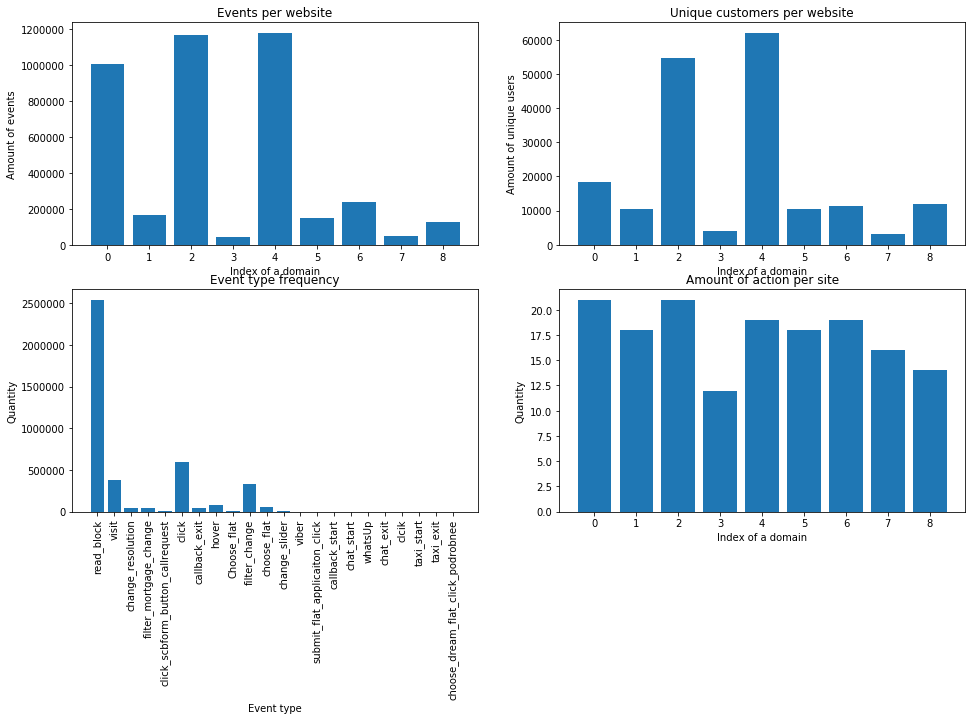

In [456]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))

# Plot number of different events per site
axes[0, 0].bar(
    [str(i) for i in range(df.domain_id.unique().shape[0])],
    [df[df.domain_id == i].shape[0] for i in df.domain_id.unique()]
)
axes[0, 0].set_title('Events per website')
axes[0, 0].set_xlabel('Index of a domain')
axes[0, 0].set_ylabel('Amount of events')

# Plot the amount of unique customers per each site
axes[0, 1].bar(
    [str(i) for i in range(df.domain_id.unique().shape[0])],
    [df[df.domain_id == i]['cookie_id'].unique().shape[0] for i in df.domain_id.unique()]
)
axes[0, 1].set_title('Unique customers per website')
axes[0, 1].set_xlabel('Index of a domain')
axes[0, 1].set_ylabel('Amount of unique users')

# Plot frequency of events throughout the set of sites
axes[1, 0].bar(
    [i for i in df.event_type.unique()],
    [df[df.event_type == i].shape[0] for i in df.event_type.unique()]
)
axes[1, 0].set_title('Event type frequency')
axes[1, 0].set_xlabel('Event type')
axes[1, 0].set_ylabel('Quantity')
axes[1, 0].xaxis.set_tick_params(rotation=90)

axes[1, 1].bar(
    [str(i) for i in range(df.domain_id.unique().shape[0])],
    [df[df.domain_id == i]['event_type'].unique().shape[0] for i in df.domain_id.unique()]
)
axes[1, 1].set_title('Amount of action per site')
axes[1, 1].set_xlabel('Index of a domain')
axes[1, 1].set_ylabel('Quantity')


Введём такой показатель, как время проведённое на сайте. Вычисляем его путём вычитания "первой" даты сессии из "последней".
Вычислив данный показатель, я подумал рассматривать всё на средних значениях, но т.к. очень много outliers'ов я решил сравнить сумарное времяпровождение на сайте. Судя по граффику, самыми интересными сайтами являются 3 и 5 (2 и 4 по индексам) сайты. Особо какой-то зависимости во времени провождения я не увидел.

In [457]:
time_at_web = {}
for domain in df.domain_id.unique():
    time_at_web.update({domain: []})
    for i in df[df.domain_id == domain].groupby('session_id'):
        time_at_web[domain].append(i[1]['date'].max() - i[1]['date'].min())

In [458]:
for domain in time_at_web:
    time_at_web[domain] = np.array(list(map(lambda x: x.total_seconds(), time_at_web[domain])))

Как я и сказал, по средним мало, что понятно. Если пролгорифмировать, то можно понять, что на 3 и 5 сайте больше народу и следовательно сумарное время будет больше. Но на 9 сайте пользователи задерживаются по-дольше, но не намного. Однако, вроде, какой-то сильной разницы во времени провождения на сайте - нет.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


 


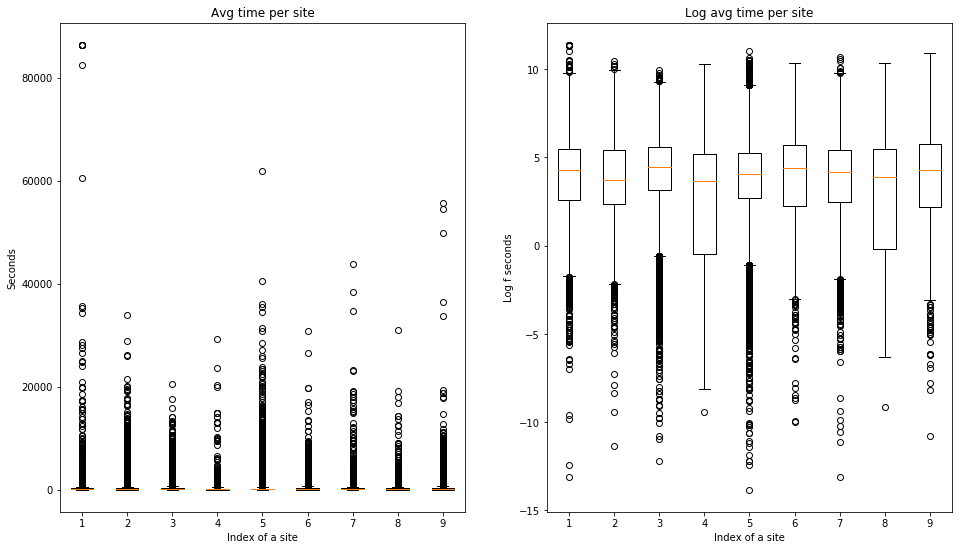

In [459]:
fig, axes = plt.subplots(1, 2, figsize=(16,9))
axes[0].boxplot(
    [time_at_web[i] for i in time_at_web],
)
axes[0].set_title('Avg time per site')
axes[0].set_ylabel('Seconds')
axes[0].set_xlabel('Index of a site')

axes[1].boxplot(
    [np.log(time_at_web[i]) for i in time_at_web],
)
axes[1].set_title('Log avg time per site')
axes[1].set_ylabel('Log f seconds')
axes[1].set_xlabel('Index of a site')

print('\0')

<BarContainer object of 9 artists>

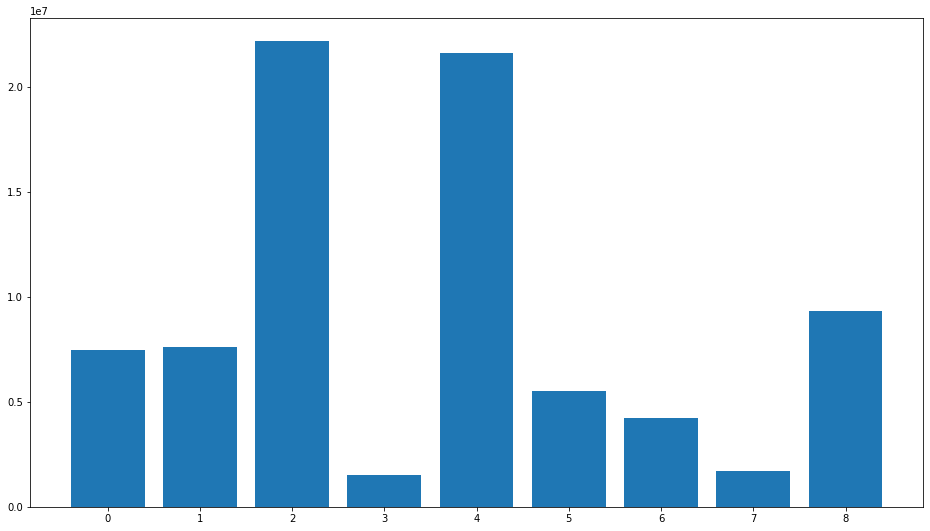

In [460]:
plt.figure(figsize=(16,9))
plt.bar(
    [str(i) for i in range(len(time_at_web))],
    [sum(time_at_web[i]) for i in time_at_web]
)

Введём новую фитчу, "часть дня". Больше всего активности происходит до 12 дня. Меньше всего ночью, вечером и после полудня примерно одинаковая активность.

In [461]:
def date_parting(date):
    if date.hour >= 0 and date.hour < 5:
        return 'night'
    if date.hour >= 5 and date.hour < 12:
        return 'morning'
    if date.hour >= 12 and date.hour < 16:
        return 'afternoon'
    if date.hour >= 16 and date.hour <= 23:
        return 'evening'
    
df['dateparting'] = df['date'].apply(lambda x: date_parting(x.time()))

<BarContainer object of 4 artists>

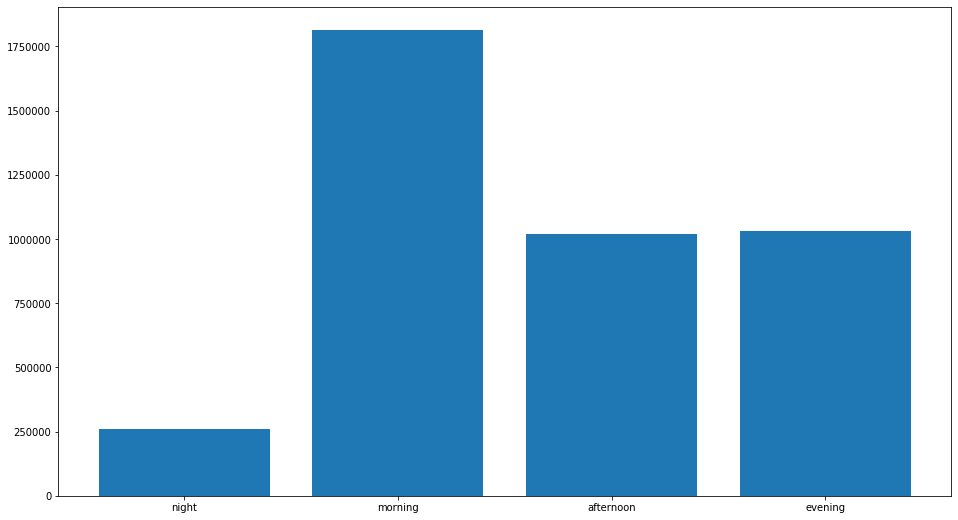

In [462]:
plt.figure(figsize=(16,9))
plt.bar(
    [i for i in df['dateparting'].unique()],
    [df[df.dateparting == i].shape[0] for i in df['dateparting'].unique()]
)

Взглянем на частоту открытия сессий.

<BarContainer object of 9 artists>

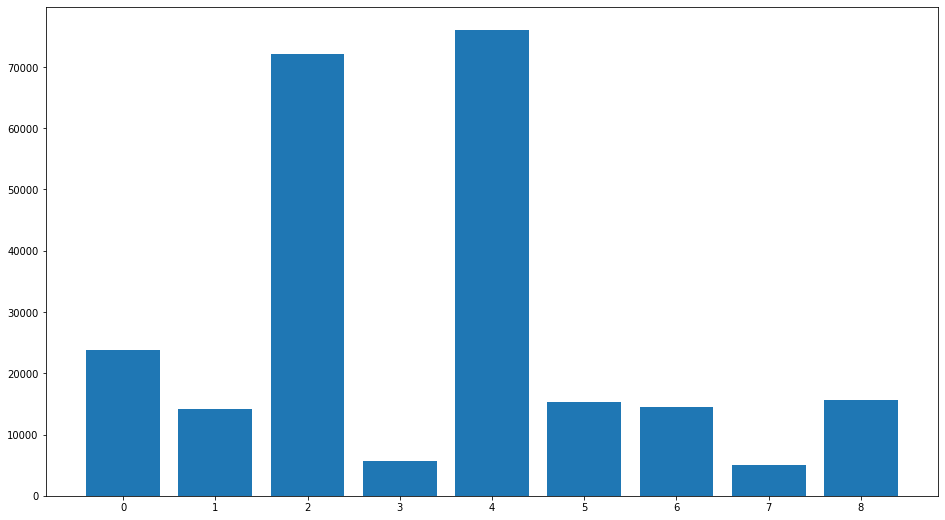

In [463]:
plt.figure(figsize=(16,9))
plt.bar(
    [str(i) for i in range(len(df['domain_id'].unique()))],
    [df[df.domain_id == i]['session_id'].unique().shape[0] for i in df['domain_id'].unique()]
)

Частота открытия сессий очень схожа с кол-вом уникальных пользователей.
В связи с этим я хочу добавить новую фитчу `customers` которая показывает кол-во уникальных пользователей.

In [464]:
for i in df['domain_id'].unique():
    df.loc[df.domain_id == i, 'customers'] = df[df.domain_id == i]['cookie_id'].unique().shape[0]

In [465]:
def corrplot(data, title="", ax=None, cbar_kw={}, cbarlabel="", squared=False, text_kw={}, valfmt="{x:.2f}", **kwargs):
    """Correlation plot (heatmap) 
    
    :param data: 2D-np.array/pandas Dataframe
    :param title: plot title
    :param ax: current axes
    :param cbar_kw: color bar parameters
    :param cbarlabel: label of a colorbar
    :param text_kw: parameters for annotation
    :param valfmt: The format of the annotations inside the heatmap.
    
    **kwargs: All other arguments are forwarded to `imshow`.
    
    """
    def heatmap(data, row_labels, col_labels, _ax=None, cbar_kw={}, cbarlabel="", **kwargs):
        """
        Create a heatmap from a numpy array and two lists of labels.

        Parameters
        ----------
        data
            A 2D numpy array of shape (N, M).
        row_labels
            A list or array of length N with the labels for the rows.
        col_labels
            A list or array of length M with the labels for the columns.
        ax
            A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
            not provided, use current axes or create a new one.  Optional.
        cbar_kw
            A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
        cbarlabel
            The label for the colorbar.  Optional.
        **kwargs
            All other arguments are forwarded to `imshow`.
        """

        if not _ax:
            _ax = plt.gca()
        # Plot the heatmap
        im = _ax.matshow(data, **kwargs)

        # Create colorbar
        cbar = _ax.figure.colorbar(im, ax=ax, **cbar_kw)
        cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom", fontsize=16)

        # We want to show all ticks...
        _ax.set_xticks(np.arange(data.shape[1]))
        _ax.set_yticks(np.arange(data.shape[0]))
        # ... and label them with the respective list entries.
        _ax.set_xticklabels(col_labels, fontsize=16)
        _ax.set_yticklabels(row_labels, fontsize=16)

        # Let the horizontal axes labeling appear on top.
        _ax.tick_params(top=True, bottom=False,
                       labeltop=True, labelbottom=False)

        # Rotate the tick labels and set their alignment.
        plt.setp(_ax.get_xticklabels(), rotation=-30, ha="right",
                 rotation_mode="anchor")

        # Turn spines off and create white grid.
        for edge, spine in _ax.spines.items():
            spine.set_visible(False)

        _ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
        _ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
        _ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
        _ax.tick_params(which="minor", bottom=False, left=False)

        return im, cbar


    def annotate_heatmap(im, data=None, valfmt="{x:.2f}", textcolors=["black", "white"], threshold=None, **textkw):
        """
        A function to annotate a heatmap.

        Parameters
        ----------
        im
            The AxesImage to be labeled.
        data
            Data used to annotate.  If None, the image's data is used.  Optional.
        valfmt
            The format of the annotations inside the heatmap.  This should either
            use the string format method, e.g. "$ {x:.2f}", or be a
            `matplotlib.ticker.Formatter`.  Optional.
        textcolors
            A list or array of two color specifications.  The first is used for
            values below a threshold, the second for those above.  Optional.
        threshold
            Value in data units according to which the colors from textcolors are
            applied.  If None (the default) uses the middle of the colormap as
            separation.  Optional.
        **kwargs
            All other arguments are forwarded to each call to `text` used to create
            the text labels.
        """

        if not isinstance(data, (list, np.ndarray)):
            data = im.get_array()

        # Normalize the threshold to the images color range.
        if threshold is not None:
            threshold = im.norm(threshold)
        else:
            threshold = im.norm(data.max())/2.

        # Set default alignment to center, but allow it to be
        # overwritten by textkw.
        kw = dict(horizontalalignment="center",
                  verticalalignment="center")
        kw.update(textkw)

        # Get the formatter in case a string is supplied
        if isinstance(valfmt, str):
            valfmt = StrMethodFormatter(valfmt)

        # Loop over the data and create a `Text` for each "pixel".
        # Change the text's color depending on the data.
        texts = []
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
                text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
                texts.append(text)

        return texts
    
    im, cbar = heatmap(data.corr()**2 if squared else data.corr(), data.columns, data.columns, _ax=ax, cbar_kw=cbar_kw, cbarlabel=cbarlabel, **kwargs)
    texts = annotate_heatmap(im, valfmt=valfmt, **text_kw)
    ax.set_title(title, fontsize=20)
    
    return im, cbar

In [466]:
def categorical_to_numeric(dataset, drop=None):
    temp_df = dataset.copy()
    
    if drop:
        temp_df = temp_df.drop(drop, axis=1)
    
    for i in temp_df.select_dtypes(['object']).columns:
        temp_df[i] = temp_df[i].astype('category')
    
    cat_columns = temp_df.select_dtypes(['category']).columns

    
    source_relates = {}
    for i in cat_columns:
        source_relates.update({i: dict(enumerate(temp_df[i].cat.categories ))})
    
    temp_df[cat_columns] = temp_df[cat_columns].apply(lambda x: x.cat.codes)
    
    
    return temp_df, source_relates

В связи с тем, что я удалю `date`, и при условии существовния `dateparting`, мне кажется будет логичным добавит среднее времяпровождение на сайте.

In [467]:
for domain in time_at_web:
    df.loc[df.domain_id == domain, 'mean_time_at_domain'] = time_at_web[domain].mean()

In [468]:
temp_df, src_rel = categorical_to_numeric(df, drop=['event_id', 'date'])

Судя по карте, кол-во пользоватаелей зависит от домена, что было показано выше (3 и 5 сайт имеют наибольшее кол-во пользователей). Как я и говорил сам домен особо не влияет на то сколько на нём проводит пользователь. Ну и логично, что среднее время, проведённое на сайте сильно коррелирует с кол-вом пользователей.

(<matplotlib.image.AxesImage at 0x232963690c8>,
 <matplotlib.colorbar.Colorbar at 0x2324b2500c8>)

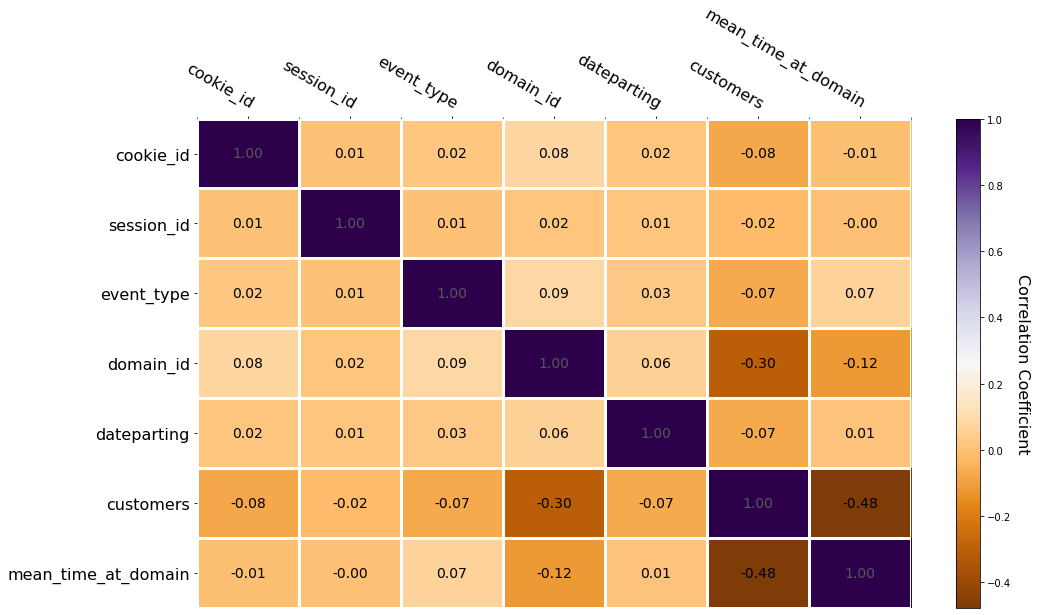

In [469]:
fig, axes = plt.subplots(1,1, figsize=(16,9))
corrplot(
    temp_df,
    cbarlabel="Correlation Coefficient",
    text_kw=dict(fontsize=14, textcolors=['black', '#575757']),
    cmap="PuOr",
    aspect='auto',
    ax=axes
)

## Моделирование

На данный момент, это все зависимости, которые я успел реализовать. Есть ещё пару идей, посмотреть среднюю проведённого времени на каждом сайте для каждого пользователя и сделать, некоторые выводы о тематике сайта (взяв в рассмотрение блоки `event_type`, которые находятся на этом сайте). Но в связи с ограниченым временем я не успю это сделать, да и может быть появятся другие идеи. Пока я думаю кластеризация будет для двух классов (интересный сайт или нет).

Я не думаю, что выйдет большое кол-во кластеров. Я выбрал K-means:

K-means (только K я выбирать не буду, я построю elbow график и посмотрю, какое кол-во кластеров предпочтительней). Так же в sklearn есть `k_means++` метод инициализации, который убирает один из главных минусов k-means - рандомизацию при повторных вычислениях. А т.к. я думаю, что разделение на кластеры будет достаточно чётким K-means один из самых подходящих алгоритмов (GMM расчитывает вероятности вхождения точки в кластер).

In [475]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(temp_df)
    distortions.append(kmeanModel.inertia_)

После второго класстера резкий спад variation'a прекращается,  следовательно и возьмём кол-во класстеров за 2.

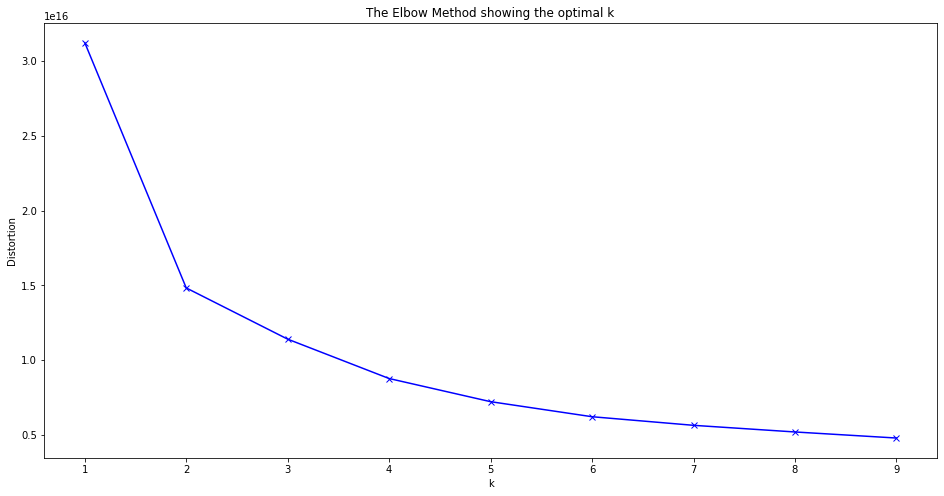

In [476]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [478]:
kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(temp_df)

KMeans(n_clusters=2)

In [480]:
temp_df['k_means']=kmeanModel.predict(temp_df)

D ht

In [497]:
temp_df[temp_df.domain_id == 0]['k_means'].mode()[0]

1

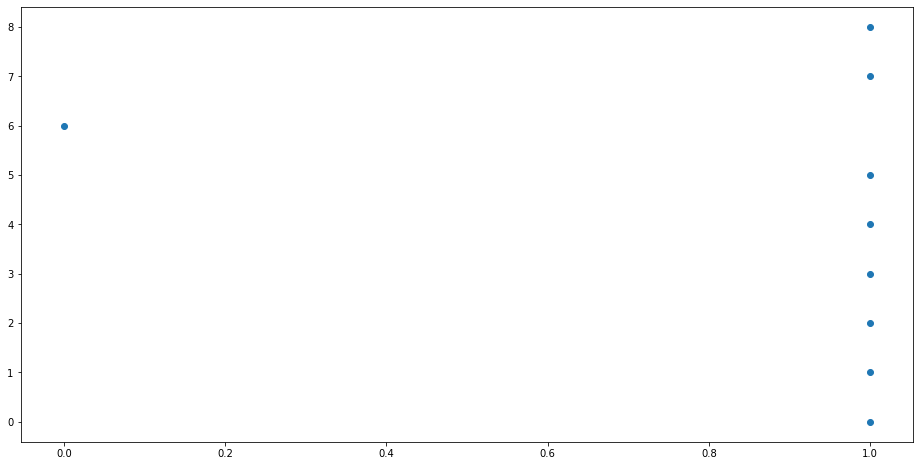

In [501]:
plt.figure(figsize=(16,8))
plt.scatter([temp_df[temp_df.domain_id == i]['k_means'].mode()[0] for i in temp_df.domain_id.unique()], [i for i in temp_df.domain_id.unique()])